In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
investments_df = pd.read_csv("investments.csv", encoding = 'ISO-8859-1').dropna()

In [4]:
rounds_df = pd.read_csv("rounds.csv", encoding = 'ISO-8859-1').drop('Unnamed: 16', axis = 1).dropna()

In [6]:
aquisitions_df = pd.read_csv("aquisitions.csv", encoding = 'ISO-8859-1').dropna();

/Users/jonathanhuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
companies_df = pd.read_csv("companies.csv", encoding = 'ISO-8859-1').dropna()
companies_df = companies_df.drop_duplicates(subset = ['name'])
companies_df.rename(columns = lambda x: x.strip(), inplace = True)

companies_df['city'] = companies_df['city'].astype(str)
companies_df['market'] = companies_df['market'].apply(lambda x: x.strip())

companies_df['funding_total_usd'] = companies_df['funding_total_usd'].apply(lambda x: x.replace(',', '').strip())
companies_df = companies_df[companies_df['funding_total_usd'] != '-']

for col in ['funding_total_usd', 'founded_year', 'funding_rounds']:
    companies_df[col] = companies_df[col].astype(int)

In [55]:
worldcities_df = pd.read_csv("worldcities.csv")[['city', 'lat', 'lng']]
worldcities_df['city'] = worldcities_df['city'].astype(str)
worldcities_df.drop_duplicates(subset=['city'], inplace = True)

In [65]:
worldcities_df[worldcities_df['city'] == 'San Francisco']

,city,lat,lng
221,San Francisco,37.7562,-122.443


In [66]:
worldcities_df[worldcities_df['city'] == 'Austin']

,city,lat,lng
442,Austin,30.3004,-97.7522


In [56]:
merge_df = companies_df.merge(worldcities_df, how = 'inner', left_on = 'city', right_on = 'city')

for col in ['lat', 'lng']:
    merge_df[col] = merge_df[col].astype(float)

In [58]:
merge_df.market = merge_df.market.apply(lambda x: 'Software' if 'Software' in x else x)

In [59]:
merge_df.market = merge_df.market.apply(lambda x: 'Health' if 'Health' in x else x)

In [60]:
merge_df.to_csv("companiesCities.csv")

In [63]:
merge_df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,lat,lng
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012,2012-06-30,2012-06-30,40.6943,-73.9249
1,/organization/1010data,1010data,http://www.1010data.com,|Software|,Software,35000000,operating,USA,NY,New York City,New York,1,2000-01-01,2000-01,2000-Q1,2000,2010-03-08,2010-03-08,40.6943,-73.9249
2,/organization/1stdibs,1stdibs,http://www.1stdibs.com,|E-Commerce|,E-Commerce,117000000,operating,USA,NY,New York City,New York,4,2001-01-01,2001-01,2001-Q1,2001,2011-11-03,2014-01-24,40.6943,-73.9249
3,/organization/20x200,20x200,http://www.20x200.com,|Social Commerce|Art|E-Commerce|,Art,2800000,operating,USA,NY,New York City,New York,2,2007-09-01,2007-09,2007-Q3,2007,2009-10-01,2010-08-01,40.6943,-73.9249
4,/organization/33across,33Across,http://www.33across.com,|Social Network Media|Advertising|,Advertising,25654560,operating,USA,NY,New York City,New York,5,2007-09-01,2007-09,2007-Q3,2007,2009-02-06,2012-07-19,40.6943,-73.9249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18376,/organization/yashi,Yashi,http://www.yashi.com,|Video|Advertising|,Video,7250000,operating,USA,NJ,Atlantic City,Toms River,4,2007-08-22,2007-08,2007-Q3,2007,2010-12-17,2014-09-16,39.9895,-74.1654
18377,/organization/yougotlistings,YouGotListings,http://www.yougotlistings.com,|Real Estate|,Real Estate,150000,operating,USA,MD,Baltimore,Fallston,1,2009-01-01,2009-01,2009-Q1,2009,2011-03-06,2011-03-06,39.5332,-76.4452
18378,/organization/your-survival,Your Survival,http://www.yoursurvival.com,|Curated Web|,Curated Web,425000,closed,USA,CT,CT - Other,Southport,1,2006-10-01,2006-10,2006-Q4,2006,2008-11-10,2008-11-10,53.6475,-3.0053
18379,/organization/yovia,Yovia,http://www.yovia.com,|Social Media Marketing|Social Media|Curated Web|,Social Media Marketing,300000,operating,USA,FL,Jacksonville,Atlantic Beach,1,2006-10-01,2006-10,2006-Q4,2006,2009-05-20,2009-05-20,30.3371,-81.4128


In [70]:
merge_df[(merge_df['market'] == 'Software') & (merge_df['city'] == 'New York')]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,lat,lng
1,/organization/1010data,1010data,http://www.1010data.com,|Software|,Software,35000000,operating,USA,NY,New York City,New York,1,2000-01-01,2000-01,2000-Q1,2000,2010-03-08,2010-03-08,40.6943,-73.9249
6,/organization/5-oclock-records,5 O'Clock Records,http://www.5oclockrecords.com,|Software|,Software,440000,operating,USA,NY,New York City,New York,2,2012-01-01,2012-01,2012-Q1,2012,2012-03-29,2013-01-08,40.6943,-73.9249
10,/organization/abacus-labs,Abacus Labs,http://abacus.com,|SaaS|Software|,Software,3500000,operating,USA,NY,New York City,New York,1,2013-01-01,2013-01,2013-Q1,2013,2014-10-29,2014-10-29,40.6943,-73.9249
54,/organization/alcohoot,ALCOHOOT,http://www.alcohoot.com,|Hardware + Software|,Software,1850000,operating,USA,NY,New York City,New York,3,2011-11-01,2011-11,2011-Q4,2011,2012-08-01,2014-08-18,40.6943,-73.9249
70,/organization/american-prison-data-systems,American Prison Data Systems,http://apdscorporate.com,|Software|,Software,2430000,operating,USA,NY,New York City,New York,1,2012-01-01,2012-01,2012-Q1,2012,2014-06-12,2014-06-12,40.6943,-73.9249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,/organization/crowdcomputing-systems,WorkFusion (previously CrowdComputing Systems),http://www.workfusion.com/,|Software|,Software,22300000,operating,USA,NY,New York City,New York,3,2010-06-01,2010-06,2010-Q2,2010,2011-01-01,2014-04-28,40.6943,-73.9249
1631,/organization/workube,Workube,http://www.workube.com,|Enterprise Software|,Software,150000,operating,USA,NY,New York City,New York,1,2008-08-01,2008-08,2008-Q3,2008,2009-01-01,2009-01-01,40.6943,-73.9249
1641,/organization/xmpie,XMPie,http://www.XMPie.com,|Software|,Software,9000000,acquired,USA,NY,New York City,New York,3,2000-01-01,2000-01,2000-Q1,2000,2001-06-01,2006-08-01,40.6943,-73.9249
1645,/organization/ycd-multimedia,YCD Multimedia,http://www.ycdmultimedia.com,|Digital Signage|Digital Media|Software|,Software,41500000,operating,USA,NY,New York City,New York,5,1999-01-01,1999-01,1999-Q1,1999,2006-03-19,2011-10-27,40.6943,-73.9249


In [61]:
markets = pd.DataFrame(merge_df.groupby('market')['market'].count())
markets.rename(columns={'market': 'count'}, inplace=True)
markets = markets[markets['count'] > 100]
markets.sort_values('count', ascending=False, inplace=True)
markets.reset_index(inplace=True)
markets

,market,count
0,Software,3286
1,Biotechnology,1597
2,Health,1107
3,Mobile,791
4,Curated Web,644
5,E-Commerce,521
6,Advertising,471
7,Clean Technology,433
8,Games,380
9,Education,320


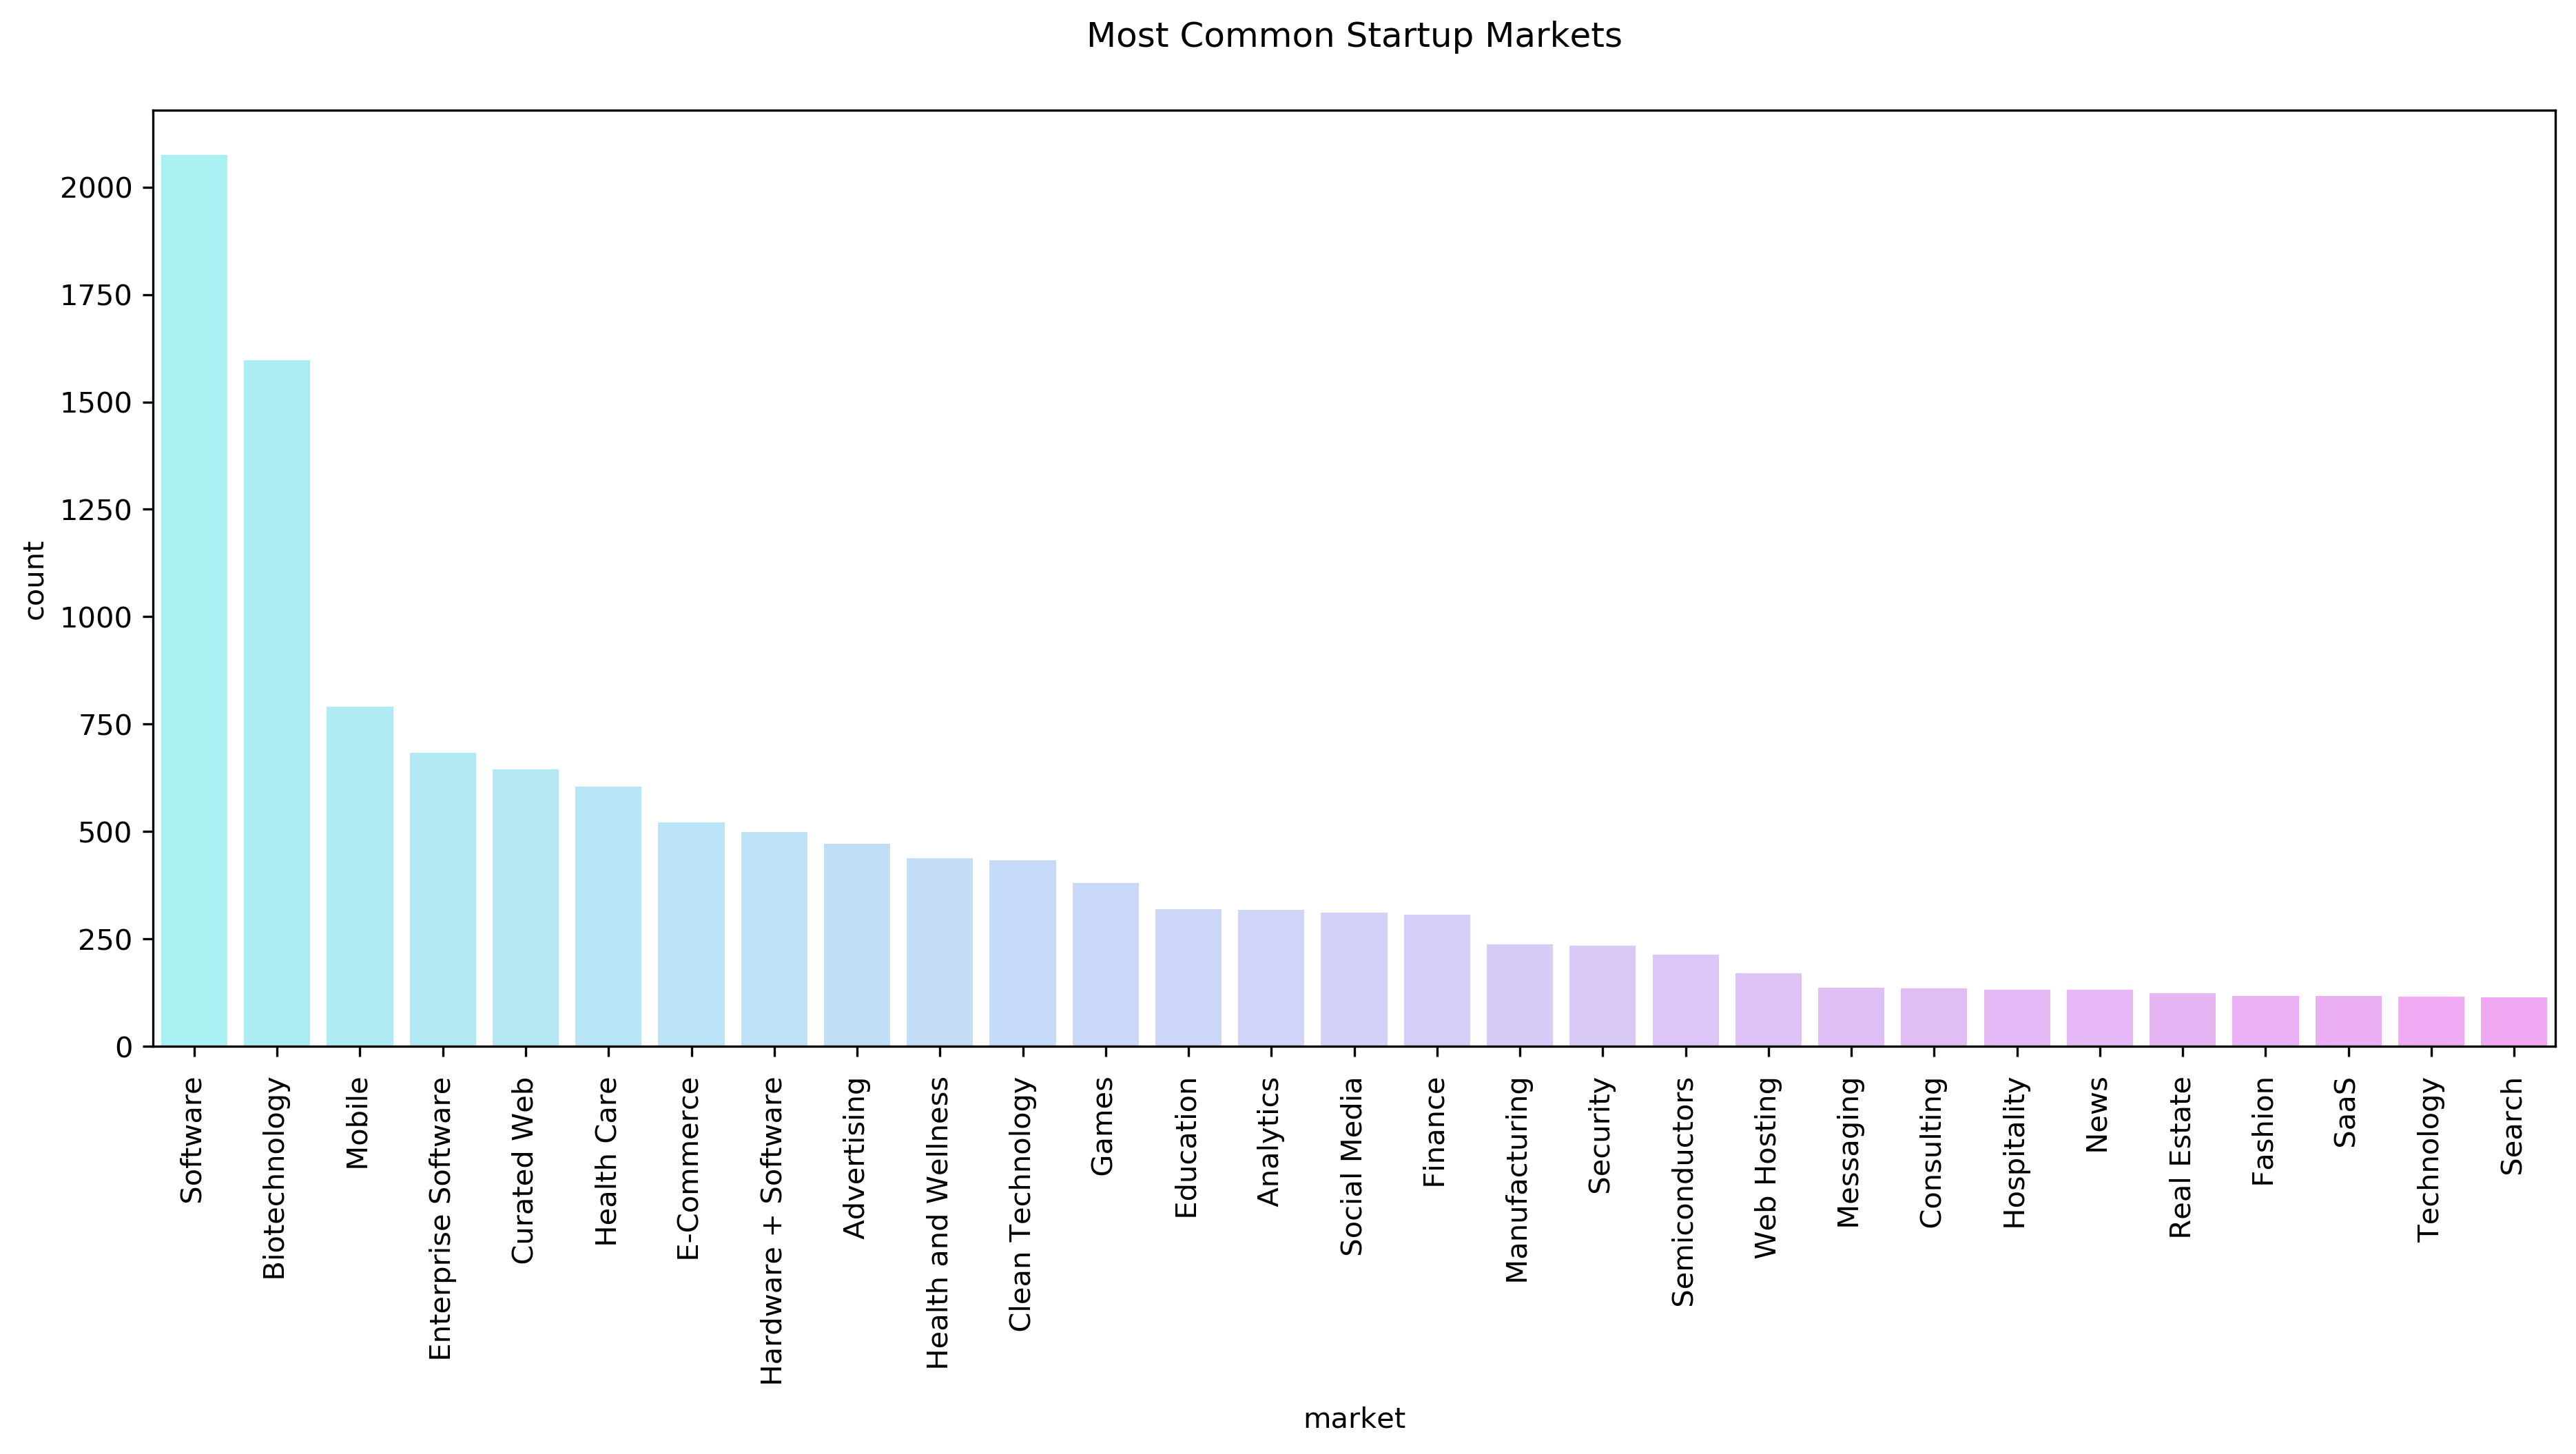

In [36]:
fig, ax = plt.subplots(1,1, figsize=(15,6), dpi=300)
sns.barplot(x='market', y='count', data=markets, ax=ax, palette='cool', alpha=.4)
plt.xticks(rotation=90)
plt.title('Most Common Startup Markets', y=1.05)
plt.show()